In [1]:
import pandas as pd
import numpy as np

**«Мегалайн»** — федеральный оператора сотовой связи. 

**Цель исследования:**

Для корректировки рекламного бюджета, необходимо понять, какой тариф компании приносит больше денег. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

План исследования:
1. [Изучение общей информации по предоставленным данным](#section1)
2. [Подготовка данных](#section2)
3. [Анализ данных](#section3)
4. [Проверка гипотез](#section4)
5. [Общий вывод](#section5)

Описание тарифов:
1. Тариф «Смарт»
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей


2. Тариф «Ультра»
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

Следует помнить:

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<a id = 'section1'></a>
## Изучение общей информации по предоставленным данным

### Таблица calls (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### Первые впечатления от таблицы CALLS

Кол-во строк **202607**. Пропущенные значения отсутствуют, что хорошо для анализа. Для того чтобы начать работать с данным необходимо привести `call_date` к формату datetime и неплохо бы было округлить вверх длительность звонков в соответсвии с условиями тарифной политики **«Мегалайн»**. Имеются 0.00 значения в `duration`, 0-ая длительность может говрить о том, что это *пропущенные* звонки, но это лишь догатки.

### Таблица internet (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

In [4]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


#### Первые впечатления от таблицы INTERNET

Кол-во строк **149396**. Пропущенные значения отсутствуют, что хорошо для анализа. Для того чтобы начать работать с данными необходимо привести `session_date` к формату datetime и неплохо бы было округлить вверх кол-во использованных Мб `mb_used` в соответсвии с условиями тарифной политики **«Мегалайн»**. Появился лишний столбец `Unnamed: 0` не несет смысловой нагрузки, идентичен индексу датафрейма, можно удалять без сожаления.

### Таблица messages (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение


In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Первые впечатления от таблицы MESSAGES

Кол-во строк **123036**. Пропущенные значения отсутствуют, что хорошо для анализа. Для того чтобы начать работать с данными необходимо привести `message_date` к формату datetime.

### Таблица users (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

In [8]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Первые впечатления от таблицы USERS

Кол-во строк **500**. Пропущенные значения присутствуют лишь в `churn_date`, пропуски логичны - *если значение пропущено, то тариф ещё действовал на момент выгрузки данных*. Для того чтобы начать работать с данными необходимо привести `reg_date` к формату datetime. Возможно придется перевести возраст к числовому типу данных (int). 

### Таблица tariffs (информация о тарифах):

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в - месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Первые впечатления от таблицы TARIFFS

Кол-во строк **2**.  Пропущенные значения отсутствуют. Типы данных корретны. Можно работать дальше.

### Вывод по шагу 1
Необходимо подготовить данные для анализа, привести к типу данных datetime все переменные, которые содержат временные значения. Затем необходимо округлить значеня минут и Мб в соответствии тарифной политикой компании. Так же подумать над корректной группировкой данных, так как таблицы содержат различное кол-во строк. В целом пропущенных значений мало и если они есть, то вполне логичны.

Предполагаю, что звонки с нулевой длинной это пропущенные звонки, скорее корректней назвать их недозвон - был исходящий звонок, но трубку никто не взял, фактически разговора не было. В своем анализе, я данные звонки оставил, так как эти данные дополняют метрику кол-во совершенных звонков и не искажают среднюю из-за их отброса, так же и не исказят длину звонков для расчета выручки, так как нулевые.

<a id = 'section2'></a>
## Подготовка данных

Приведение данных к соответсвующим типам, корректным значениям, как говорилось ранее

Приводим дату звонка к формату datetime

In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

Производим грубое округление длинны звонков в соответствии с тарифной политикой компании.

In [14]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


В промежуточной проверке, видим, что сделали все верно

In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Приводим дату интернет сессии  к формату datetime

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

Производим грубое округление кол-ва использованных Мб в соответствии с тарифной политикой компании.

In [17]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

Удаление ненужных столбцов

In [18]:
internet = internet.drop(['Unnamed: 0'], axis = 1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


В промежуточной проверке, видим, что сделали все верно

In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


Приводим дату отправки смс  к формату datetime

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

В промежуточной проверке, видим, что сделали все верно

In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Приводим дату подключения тарифа к формату datetime

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

В промежуточной проверке, видим, что сделали все верно

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [24]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Начнем подготовку данных для формирования общего отчета о продажах. Сгруппирируем данные по уникальному ID пользователей и отобразим дату подключения тарифа.

In [25]:
user_id_group = users.groupby('user_id')['reg_date'].min().reset_index()
user_id_group

,user_id,reg_date
0,1000,2018-05-25
1,1001,2018-11-01
2,1002,2018-06-17
3,1003,2018-08-17
4,1004,2018-05-14
...,...,...
495,1495,2018-08-28
496,1496,2018-01-27
497,1497,2018-10-09
498,1498,2018-07-19


Создадим столбец `reg_month`, который будет содержать первый день месяца подключения к соответсвующему тарифу.

In [26]:
user_id_group['reg_month'] = user_id_group['reg_date'].values.astype('datetime64[M]')
user_id_group

,user_id,reg_date,reg_month
0,1000,2018-05-25,2018-05-01
1,1001,2018-11-01,2018-11-01
2,1002,2018-06-17,2018-06-01
3,1003,2018-08-17,2018-08-01
4,1004,2018-05-14,2018-05-01
...,...,...,...
495,1495,2018-08-28,2018-08-01
496,1496,2018-01-27,2018-01-01
497,1497,2018-10-09,2018-10-01
498,1498,2018-07-19,2018-07-01


In [27]:
min_month = users['reg_date'].values.astype('datetime64[M]').min()

In [28]:
max_month = users['reg_date'].values.astype('datetime64[M]').max()

Создадим массив, где будут указаны все месяцы анализа

In [29]:
each_month = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'), columns = ['monthes'])
each_month

,monthes
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


Проверка кол-ва строк

In [30]:
len(users)*len(each_month)

6000

Создаем ключи для merge. 

In [31]:
user_id_group['key'] = 1
each_month['key'] = 1

Для каждого пользователя присвоим интервал времени в 12 месяцев, путем склейки двух таблиц

In [32]:
total_report = each_month.merge(user_id_group,on='key')
total_report.head()

,monthes,key,user_id,reg_date,reg_month
0,2018-01-01,1,1000,2018-05-25,2018-05-01
1,2018-01-01,1,1001,2018-11-01,2018-11-01
2,2018-01-01,1,1002,2018-06-17,2018-06-01
3,2018-01-01,1,1003,2018-08-17,2018-08-01
4,2018-01-01,1,1004,2018-05-14,2018-05-01


Ранее был добавлен столбец `monthes` с целью оценки характера использования тарифного плана по месячно для каждого пользователя. Так как клиент мог подключить тариф не с начала года, то по некоторым месяцам информация избыточна. Произведена фильтрация по условию: если дата начала использования тарифа позже отчетного месяца, то данные отбрасываются.

In [33]:
total_report = total_report[total_report['monthes'] >= total_report['reg_month']]
total_report.head(10)

,monthes,key,user_id,reg_date,reg_month
5,2018-01-01,1,1005,2018-01-25,2018-01-01
32,2018-01-01,1,1032,2018-01-04,2018-01-01
45,2018-01-01,1,1045,2018-01-30,2018-01-01
55,2018-01-01,1,1055,2018-01-02,2018-01-01
71,2018-01-01,1,1071,2018-01-09,2018-01-01
113,2018-01-01,1,1113,2018-01-24,2018-01-01
120,2018-01-01,1,1120,2018-01-24,2018-01-01
126,2018-01-01,1,1126,2018-01-19,2018-01-01
134,2018-01-01,1,1134,2018-01-16,2018-01-01
135,2018-01-01,1,1135,2018-01-29,2018-01-01


Проверка по пользователям с id  1000 и 1005

In [34]:
total_report[total_report['user_id'] == 1000]

,monthes,key,user_id,reg_date,reg_month
2000,2018-05-01,1,1000,2018-05-25,2018-05-01
2500,2018-06-01,1,1000,2018-05-25,2018-05-01
3000,2018-07-01,1,1000,2018-05-25,2018-05-01
3500,2018-08-01,1,1000,2018-05-25,2018-05-01
4000,2018-09-01,1,1000,2018-05-25,2018-05-01
4500,2018-10-01,1,1000,2018-05-25,2018-05-01
5000,2018-11-01,1,1000,2018-05-25,2018-05-01
5500,2018-12-01,1,1000,2018-05-25,2018-05-01


In [35]:
total_report[total_report['user_id'] == 1005]

,monthes,key,user_id,reg_date,reg_month
5,2018-01-01,1,1005,2018-01-25,2018-01-01
505,2018-02-01,1,1005,2018-01-25,2018-01-01
1005,2018-03-01,1,1005,2018-01-25,2018-01-01
1505,2018-04-01,1,1005,2018-01-25,2018-01-01
2005,2018-05-01,1,1005,2018-01-25,2018-01-01
2505,2018-06-01,1,1005,2018-01-25,2018-01-01
3005,2018-07-01,1,1005,2018-01-25,2018-01-01
3505,2018-08-01,1,1005,2018-01-25,2018-01-01
4005,2018-09-01,1,1005,2018-01-25,2018-01-01
4505,2018-10-01,1,1005,2018-01-25,2018-01-01


В итоге получили таблицу, где содержиться информация по каждому пользователю по-месячно. Теперь необходимо данную таблицу наполнить данными по тарифам.

Проверка по уникальным номерам сессии.

In [36]:
len(calls['id'].unique())

202607

In [37]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [38]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Добавляем `monthes`, где будет указан месяц звонка

In [39]:
calls['monthes'] = calls['call_date'].values.astype('datetime64[M]')
calls

,id,call_date,duration,user_id,monthes
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,2018-12-01
202603,1499_216,2018-10-18,19,1499,2018-10-01
202604,1499_217,2018-11-10,11,1499,2018-11-01
202605,1499_218,2018-10-06,5,1499,2018-10-01


Произведем группировку по уникальному id и месяцу совершения операции, найдем кол-во звонков и общее время разговора помесячно.

In [40]:
calls_month = calls.groupby(['user_id', 'monthes'])[['duration']].agg(['count', 'sum']).reset_index()
calls_month

user_id    monthes duration     
                           count  sum
0       1000 2018-05-01       22  159
1       1000 2018-06-01       43  172
2       1000 2018-07-01       47  340
3       1000 2018-08-01       52  408
4       1000 2018-09-01       58  466
...      ...        ...      ...  ...
3169    1498 2018-10-01       41  247
3170    1499 2018-09-01        9   70
3171    1499 2018-10-01       68  449
3172    1499 2018-11-01       74  612
3173    1499 2018-12-01       69  492

[3174 rows x 4 columns]

In [41]:
calls_month.columns = ['user_id', 'monthes', 'number_of_calls', 'total_min']
calls_month

,user_id,monthes,number_of_calls,total_min
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466
...,...,...,...,...
3169,1498,2018-10-01,41,247
3170,1499,2018-09-01,9,70
3171,1499,2018-10-01,68,449
3172,1499,2018-11-01,74,612


Проверка значений по total

In [42]:
calls['duration'].sum()

1450301

In [43]:
calls['duration'].count()

202607

In [44]:
calls_month['number_of_calls'].sum()

202607

In [45]:
calls_month['total_min'].sum()

1450301

Наполнение общего отчета данными по звонкам.

In [46]:
total_report = total_report.merge(calls_month,how='left',on=['user_id','monthes'])
total_report

,monthes,key,user_id,reg_date,reg_month,number_of_calls,total_min
0,2018-01-01,1,1005,2018-01-25,2018-01-01,15.0,95.0
1,2018-01-01,1,1032,2018-01-04,2018-01-01,61.0,380.0
2,2018-01-01,1,1045,2018-01-30,2018-01-01,1.0,9.0
3,2018-01-01,1,1055,2018-01-02,2018-01-01,64.0,551.0
4,2018-01-01,1,1071,2018-01-09,2018-01-01,24.0,194.0
...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,2018-08-28,2018-08-01,155.0,1031.0
3255,2018-12-01,1,1496,2018-01-27,2018-01-01,80.0,518.0
3256,2018-12-01,1,1497,2018-10-09,2018-10-01,71.0,545.0
3257,2018-12-01,1,1498,2018-07-19,2018-07-01,NaN,NaN


Проверка по уникальным номерам сессии

In [47]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [48]:
len(internet['id'].unique())

149396

In [49]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


Добавляем `monthes`, где будет указан месяц пользования интернетом

In [50]:
internet['monthes'] = internet['session_date'].values.astype('datetime64[M]')
internet

,id,mb_used,session_date,user_id,monthes
0,1000_0,113,2018-11-25,1000,2018-11-01
1,1000_1,1053,2018-09-07,1000,2018-09-01
2,1000_2,1198,2018-06-25,1000,2018-06-01
3,1000_3,551,2018-08-22,1000,2018-08-01
4,1000_4,303,2018-09-24,1000,2018-09-01
...,...,...,...,...,...
149391,1499_152,319,2018-10-03,1499,2018-10-01
149392,1499_153,491,2018-12-14,1499,2018-12-01
149393,1499_154,0,2018-10-27,1499,2018-10-01
149394,1499_155,1247,2018-11-26,1499,2018-11-01


Произведем группировку по уникальному id и месяцу совершения операции, найдем кол-во используемого трафика помесячно.

In [51]:
internet_month = internet.groupby(['user_id', 'monthes'])[['mb_used']].agg(['sum']).reset_index()
internet_month

,user_id,monthes,mb_used
,,,sum
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
...,...,...,...
3198,1498,2018-10-01,20604
3199,1499,2018-09-01,1848
3200,1499,2018-10-01,17809


In [52]:
internet_month.columns = ['user_id', 'monthes', 'mb_used']
internet_month

,user_id,monthes,mb_used
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
...,...,...,...
3198,1498,2018-10-01,20604
3199,1499,2018-09-01,1848
3200,1499,2018-10-01,17809
3201,1499,2018-11-01,17984


Проверка значений по total

In [53]:
internet['mb_used'].sum()

55369459

In [54]:
internet_month['mb_used'].sum()

55369459

Наполнение общего отчета данными по интернет трафику.

In [55]:
total_report = total_report.merge(internet_month,how='left',on=['user_id','monthes'])
total_report

,monthes,key,user_id,reg_date,reg_month,number_of_calls,total_min,mb_used
0,2018-01-01,1,1005,2018-01-25,2018-01-01,15.0,95.0,2730.0
1,2018-01-01,1,1032,2018-01-04,2018-01-01,61.0,380.0,24147.0
2,2018-01-01,1,1045,2018-01-30,2018-01-01,1.0,9.0,2348.0
3,2018-01-01,1,1055,2018-01-02,2018-01-01,64.0,551.0,17111.0
4,2018-01-01,1,1071,2018-01-09,2018-01-01,24.0,194.0,15622.0
...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,2018-08-28,2018-08-01,155.0,1031.0,23450.0
3255,2018-12-01,1,1496,2018-01-27,2018-01-01,80.0,518.0,20757.0
3256,2018-12-01,1,1497,2018-10-09,2018-10-01,71.0,545.0,19940.0
3257,2018-12-01,1,1498,2018-07-19,2018-07-01,NaN,NaN,NaN


In [56]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверка по уникальным номерам сессии

In [57]:
len(messages['id'].unique())

123036

In [58]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Добавляем `monthes`, где будет указан месяц отправки сообщения

In [59]:
messages['monthes'] = messages['message_date'].values.astype('datetime64[M]')
messages

,id,message_date,user_id,monthes
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01
...,...,...,...,...
123031,1499_179,2018-12-12,1499,2018-12-01
123032,1499_180,2018-09-28,1499,2018-09-01
123033,1499_181,2018-09-27,1499,2018-09-01
123034,1499_182,2018-11-15,1499,2018-11-01


Произведем группировку по уникальному id и месяцу совершения операции, найдем кол-во отправленных сообщений.

In [60]:
messages_month = messages.groupby(['user_id', 'monthes'])[['id']].agg(['count']).reset_index()
messages_month

,user_id,monthes,id
,,,count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48


In [61]:
messages_month.columns = ['user_id', 'monthes', 'message_numbers']
messages_month

,user_id,monthes,message_numbers
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


Проверка данных по total

In [62]:
len(messages)

123036

In [63]:
messages_month['message_numbers'].sum()

123036

Наполнение общего отчета данными по израсходованным сообщениям.

In [64]:
total_report = total_report.merge(messages_month,how='left',on=['user_id','monthes'])
total_report

,monthes,key,user_id,reg_date,reg_month,number_of_calls,total_min,mb_used,message_numbers
0,2018-01-01,1,1005,2018-01-25,2018-01-01,15.0,95.0,2730.0,7.0
1,2018-01-01,1,1032,2018-01-04,2018-01-01,61.0,380.0,24147.0,38.0
2,2018-01-01,1,1045,2018-01-30,2018-01-01,1.0,9.0,2348.0,5.0
3,2018-01-01,1,1055,2018-01-02,2018-01-01,64.0,551.0,17111.0,30.0
4,2018-01-01,1,1071,2018-01-09,2018-01-01,24.0,194.0,15622.0,16.0
...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,2018-08-28,2018-08-01,155.0,1031.0,23450.0,84.0
3255,2018-12-01,1,1496,2018-01-27,2018-01-01,80.0,518.0,20757.0,51.0
3256,2018-12-01,1,1497,2018-10-09,2018-10-01,71.0,545.0,19940.0,17.0
3257,2018-12-01,1,1498,2018-07-19,2018-07-01,NaN,NaN,NaN,NaN


In [65]:
total_report = total_report.drop(['key', 'reg_date'], axis = 1)

Посчитаем сколько стоит 1 мб интернета

In [66]:
tariffs['rub_per_mb'] = tariffs['rub_per_gb'] / 1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb
0,50,15360,500,550,200,3,3,smart,0.195312
1,1000,30720,3000,1950,150,1,1,ultra,0.146484


Наполнение таблицы с  полозователями данными по пакетным расходам  согласно тарификации 

In [67]:
total_report = users.merge(total_report,how='left',on='user_id')
total_report.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22.0,159.0,2256.0,22.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43.0,172.0,23257.0,60.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47.0,340.0,14016.0,75.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52.0,408.0,14070.0,81.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58.0,466.0,14581.0,57.0
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-10-01,2018-05-01,57.0,350.0,14717.0,73.0
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-11-01,2018-05-01,43.0,338.0,14768.0,58.0
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-12-01,2018-05-01,46.0,333.0,9827.0,70.0
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,2018-11-01,59.0,430.0,18452.0,NaN
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,2018-11-01,63.0,414.0,14053.0,NaN


In [68]:
total_report[['number_of_calls',
              'total_min', 'mb_used', 'message_numbers']] = total_report[['number_of_calls', 
                                                                          'total_min', 'mb_used', 
                                                                          'message_numbers']].astype('Int64')

In [69]:
total_report.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57


Создадим таблицу для подсчета выручки, полученной компанией Мегалайн, за каждого пользователя помесячно

In [70]:
revenue_calculation = total_report.copy()

In [71]:
tariffs['tariff'] = tariffs['tariff_name']
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb,tariff
0,50,15360,500,550,200,3,3,smart,0.195312,smart
1,1000,30720,3000,1950,150,1,1,ultra,0.146484,ultra


Создадим таблицу для подсчета выручки

In [72]:
revenue_calculation = revenue_calculation.merge(tariffs,how='left',on='tariff')
revenue_calculation.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,...,message_numbers,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,...,22,1000,30720,3000,1950,150,1,1,ultra,0.146484
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,...,60,1000,30720,3000,1950,150,1,1,ultra,0.146484
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,...,75,1000,30720,3000,1950,150,1,1,ultra,0.146484
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,...,81,1000,30720,3000,1950,150,1,1,ultra,0.146484
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,...,57,1000,30720,3000,1950,150,1,1,ultra,0.146484


Функция для подсчета выручки 

In [73]:
def revenue(row):
    delta_minutes = row['total_min'] - row['minutes_included']
    delta_mb = row['mb_used'] - row['mb_per_month_included']
    delta_mess = row['message_numbers'] - row['messages_included']
    extra_minutes = 0
    extra_mb = 0
    extra_mess = 0
    if  delta_minutes > 0:
        extra_minutes = delta_minutes * row['rub_per_minute']
    if delta_mb > 0:
        extra_mb = delta_mb * row['rub_per_mb']
    if delta_mess > 0:
        extra_mess = delta_mess * row['rub_per_message']
    revenue = row['rub_monthly_fee'] + extra_minutes + extra_mb + extra_mess
    return revenue

In [74]:
revenue_calculation['revenue'] = revenue_calculation.apply(revenue, axis = 1)

In [75]:
revenue_calculation.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,...,1000,30720,3000,1950,150,1,1,ultra,0.146484,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,...,1000,30720,3000,1950,150,1,1,ultra,0.146484,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,...,1000,30720,3000,1950,150,1,1,ultra,0.146484,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,...,1000,30720,3000,1950,150,1,1,ultra,0.146484,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,...,1000,30720,3000,1950,150,1,1,ultra,0.146484,1950.0


In [76]:
short_revenue = revenue_calculation[['user_id','monthes', 'revenue']].round(2)
short_revenue.head()

,user_id,monthes,revenue
0,1000,2018-05-01,1950.0
1,1000,2018-06-01,1950.0
2,1000,2018-07-01,1950.0
3,1000,2018-08-01,1950.0
4,1000,2018-09-01,1950.0


Собираем общий отчет воедино

In [77]:
total_report = total_report.merge(short_revenue, how='left',on=['user_id','monthes'])
total_report.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57,1950.0


Вывод по шагу 2

В итоге собрали единую таблицу, так называемую "Отчет о продажах", где отражено сколько минут, мб и смс каждый пользователь израсходывал за 2018 помесячно. Теперь можно приступать к непосредстивенномк анализу.

<a id = 'section3'></a>
## Анализ данных

Первое, что хочется посмотреть - распределение по минутам, Мб, смс среди пользователей по соответсвующим тарифам.

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

Разабъем данные на 2 тарифа

In [80]:
ultra = total_report.query('tariff == "ultra"')
ultra.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57,1950.0


In [81]:
len(ultra)

1006

In [82]:
smart = total_report.query('tariff == "smart"')
smart.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,2018-11-01,59,430,18452,NaN,1153.91
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,2018-11-01,63,414,14053,NaN,550.00
10,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01,2018-06-01,15,117,10871,4,550.00
11,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-07-01,2018-06-01,26,214,17601,11,987.70
12,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-08-01,2018-06-01,42,289,20347,13,1524.02


In [83]:
len(smart)

2253

Построим гистограммы плотности распределения кол-ва ежемесячно потраченных минут для каждого тарифа

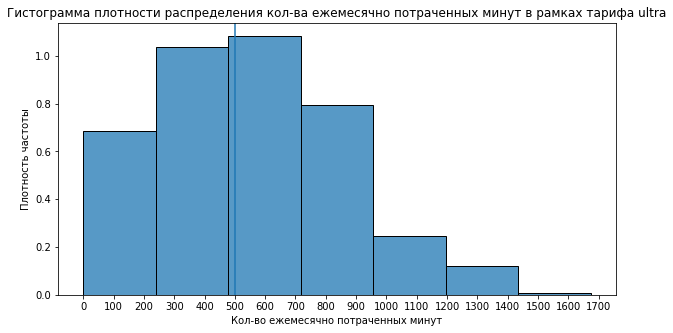

In [84]:
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 1750, 100))
sns.histplot(data=ultra, x='total_min', stat ='frequency', bins = 7)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных минут')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных минут в рамках тарифа ultra')
plt.axvline(500, 0, 4.0)
plt.show()

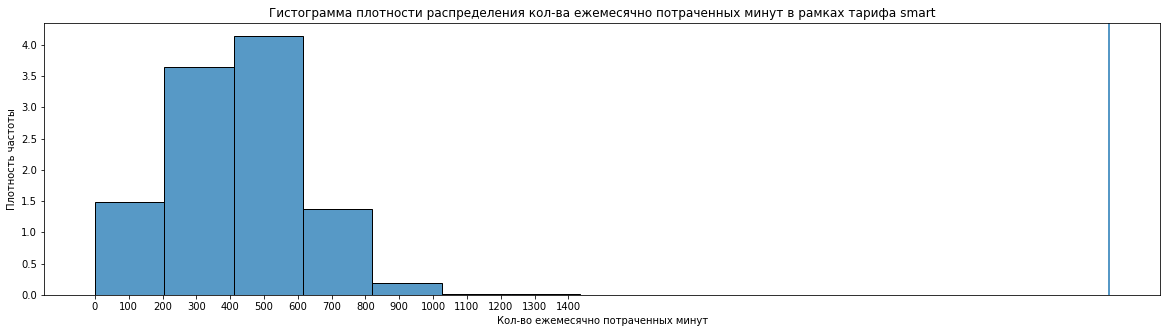

In [85]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0, 1500, 100))
sns.histplot(data=smart, x='total_min', stat ='frequency', bins = 7)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных минут')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных минут в рамках тарифа smart')
plt.axvline(3000, 0, 4.0)
plt.show()

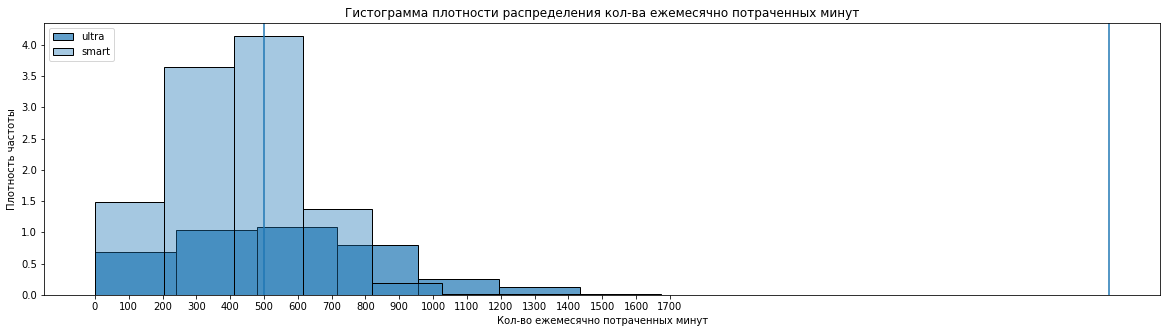

In [137]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0, 1750, 100))
sns.histplot(data=ultra, x='total_min', stat ='frequency', bins = 7, alpha = 0.7)
sns.histplot(data=smart, x='total_min', stat ='frequency', bins = 7, alpha = 0.4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных минут')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных минут')
plt.legend(['ultra', 'smart'])
plt.axvline(500, 0, 4.0)
plt.axvline(3000, 0, 4.0)
plt.show()

Тарифы
- smart: кол-во бесплатных минут, включенных в абонентскую плату составляет 500. На представленной гистограмме кол-во случаев превышения данного лимита составило примерно 782 раза (на глаз 110 * 4,2 + 200 * 1,4 + 200 * 0,2), что составило 34 % всех данных. В принципе большая часть пользователей укладывается в рамки тарифа по минутам.
- ultra: кол-во бесплатных минут, включенных в абонентскую плату составляет 3000.  На представленной гистограмме кол-во случаев превышения данного лимита значений нет.

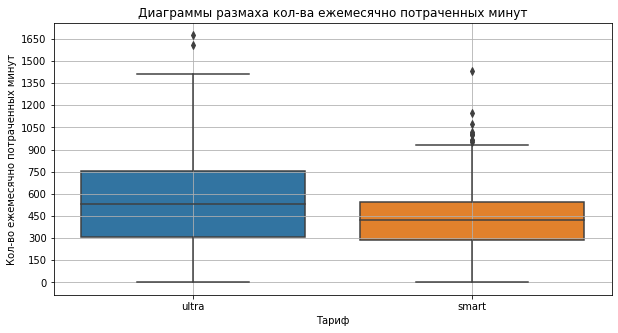

In [87]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0, 1750, 150))
sns.boxplot(x='tariff', y='total_min', data=total_report)
plt.grid()
plt.title('Диаграммы размаха кол-ва ежемесячно потраченных минут')
plt.xlabel('Тариф')
plt.ylabel('Кол-во ежемесячно потраченных минут')
plt.show()

In [88]:
smart_means_per_monthes = smart.groupby('monthes')[['total_min', 'mb_used', 'message_numbers', 'revenue']].agg('mean').reset_index()
smart_means_per_monthes.columns = ['monthes', 'mean_min', 'mean_mb', 'mean_mess', ' mean_revenue']
smart_means_per_monthes['month'] = smart_means_per_monthes['monthes'].dt.month
smart_means_per_monthes

,monthes,mean_min,mean_mb,mean_mess,mean_revenue,month
0,2018-01-01,203.852941,8524.441176,20.000000,702.555882,1
1,2018-02-01,298.689655,11611.396552,27.940000,804.337759,2
2,2018-03-01,390.051948,15123.857143,35.550725,1118.382208,3
3,2018-04-01,367.133929,13479.482143,35.864583,922.340536,4
4,2018-05-01,387.361702,15825.198582,39.032787,1146.922057,5
5,2018-06-01,398.067485,15814.768293,38.577465,1149.579695,6
6,2018-07-01,408.353234,15763.512438,38.988506,1168.063433,7
7,2018-08-01,423.269231,16703.252137,38.750000,1258.497787,8
8,2018-09-01,430.266409,16324.526923,39.219731,1196.585670,9
9,2018-10-01,427.590444,16778.564626,39.082677,1299.742061,10


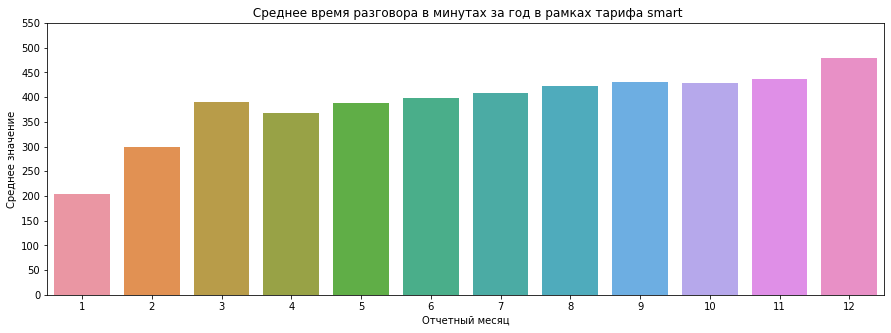

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=smart_means_per_monthes, x='month', y='mean_min')
plt.yticks(np.arange(0, 600, 50))
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее время разговора в минутах за год в рамках тарифа smart')
plt.show()

In [90]:
ultra_means_per_monthes = ultra.groupby('monthes')[['total_min', 'mb_used', 'message_numbers', 'revenue']].agg('mean').reset_index()
ultra_means_per_monthes.columns = ['monthes', 'mean_min', 'mean_mb', 'mean_mess', ' mean_revenue']
ultra_means_per_monthes['month'] = smart_means_per_monthes['monthes'].dt.month
ultra_means_per_monthes

,monthes,mean_min,mean_mb,mean_mess,mean_revenue,month
0,2018-01-01,428.111111,13153.555556,43.428571,1950.000000,1
1,2018-02-01,297.125000,12858.500000,32.937500,1973.047083,2
2,2018-03-01,489.648649,17551.972973,47.800000,2004.171622,3
3,2018-04-01,475.301887,16843.800000,44.512821,1995.431636,4
4,2018-05-01,534.250000,19674.848485,48.769231,2054.965970,5
5,2018-06-01,497.469136,19170.457831,52.313433,2032.060714,6
6,2018-07-01,564.397727,20742.588889,62.136986,2108.502527,7
7,2018-08-01,530.611650,19778.915094,58.897727,2071.152243,8
8,2018-09-01,558.882883,19390.824561,63.294737,2013.176552,9
9,2018-10-01,581.728814,20228.327869,69.776699,2054.372302,10


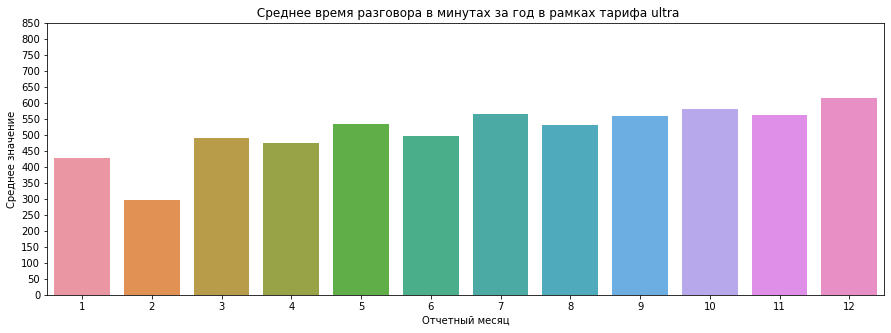

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(data=ultra_means_per_monthes, x='month', y='mean_min')
plt.yticks(np.arange(0, 900, 50))
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее время разговора в минутах за год в рамках тарифа ultra')
plt.show()

Среднее время разговора в рамках тарифа в разрезе годового периода
- smart: Явно наблюдается тенденция, что к концу года время разговоров увеличивается.
- ultra: Имеется небольшое увеличение среднего времени разговора к концу года, но не сильное, определенной тенденции нет. Средние значения на всем периоде более менее равны

In [92]:
def basic_stats(row):
    mean = row.mean()
    var = np.var(row, ddof=1)
    std = np.sqrt(var)
    return ('Среднее: {}'.format(mean),'Дисперсия: {}'.format(var), 'Стандартное отклонение: {}'.format(std))

In [93]:
basic_stats(ultra['total_min'])

('Среднее: 545.4511041009464',
 'Дисперсия: 94203.4183961481',
 'Стандартное отклонение: 306.9257538821858')

In [94]:
basic_stats(smart['total_min'])

('Среднее: 419.0629779577148',
 'Дисперсия: 35844.1895513438',
 'Стандартное отклонение: 189.3256177894154')

Описание распределения кол-ва ежемесячно потраченных минут в рамках тарифа.
- smart: В среденем пользователи тарифа разговаривают 419 минут в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 986 минут, 66 % всех значений в промежутке от 41 до 797 минут. В целом распределение похоже на нормальное со средним 419 и стандартным отклонением 189.
- ultra: В среденем пользователи тарифа разговаривают 545 минут в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 1463 минут, 66 % всех значений в промежутке от 0 до 1157 минут. В целом распределение немного скошено вправо со средним 545 и стандартным отклонением 306, что также видно на диаграмме размаха.

Построим гистограммы плотности распределения кол-ва ежемесячно потраченных Мб для каждого тарифа

In [95]:
total_report.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57,1950.0


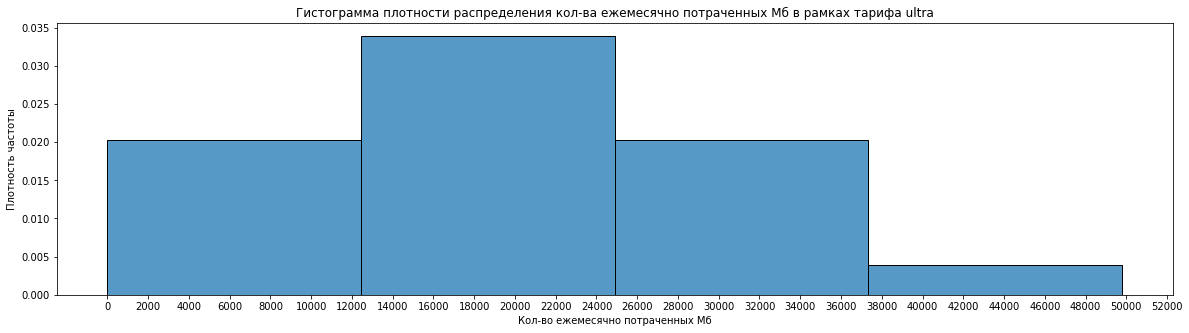

In [96]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0, 60000, 2000))
sns.histplot(data=ultra, x='mb_used', stat ='frequency', bins = 4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных Мб')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных Мб в рамках тарифа ultra')
plt.show()

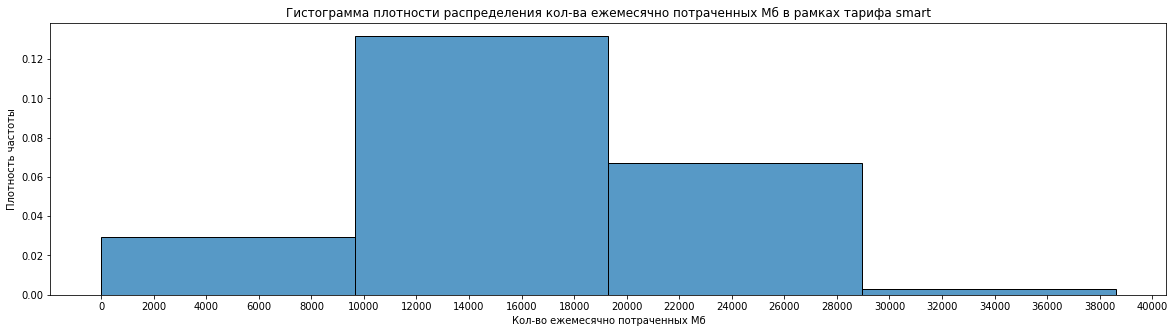

In [97]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0, 60000, 2000))
sns.histplot(data=smart, x='mb_used', stat ='frequency', bins = 4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных Мб')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных Мб в рамках тарифа smart')
plt.show()

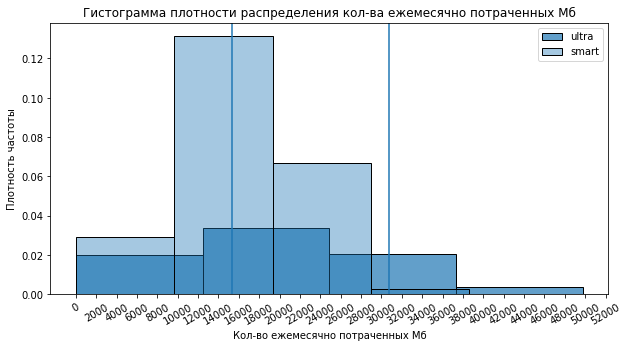

In [98]:
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 60000, 2000))
sns.histplot(data=ultra, x='mb_used', stat ='frequency', bins = 4, alpha = 0.7)
sns.histplot(data=smart, x='mb_used', stat ='frequency', bins = 4, alpha = 0.4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных Мб')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных Мб')
plt.legend(['ultra', 'smart'])
plt.axvline(30720, 0, 1.12)
plt.axvline(15360, 0, 1.12)
plt.xticks(rotation=30)
plt.show()

Тарифы
- smart: кол-во бесплатных МБ, включенных в абонентскую плату составляет 15360. На представленной гистограмме кол-во случаев превышения данного лимита составило примерно 1360 раз (на глаз 4000 * 0.14 + 10000 * 0.07 + 1000 * 0.01), что составило 60 % всех данных. В принципе большая часть пользователей расходует больше Мб, чем предоставлено в тарифе.
- ultra: кол-во бесплатных МБ, включенных в абонентскую плату составляет 30720.  На представленной гистограмме кол-во случаев превышения данного лимита составило примерно 219 раз (на глаз 8280 * 0.02 + 10500 * 0.005), что составило 22 % всех данных. В принципе большая часть пользователей расходует Мб в пределах бесплатного лимита в рамках тарифа.

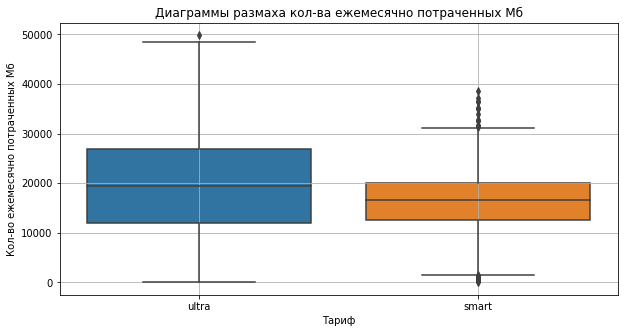

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='tariff', y='mb_used', data=total_report)
plt.grid()
plt.title('Диаграммы размаха кол-ва ежемесячно потраченных Мб')
plt.xlabel('Тариф')
plt.ylabel('Кол-во ежемесячно потраченных Мб')
plt.show()

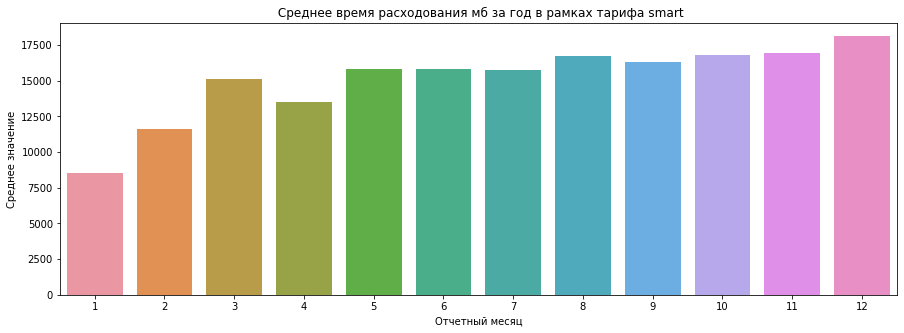

In [100]:
plt.figure(figsize=(15,5))
sns.barplot(data=smart_means_per_monthes, x='month', y='mean_mb')
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее время расходования мб за год в рамках тарифа smart')
plt.show()

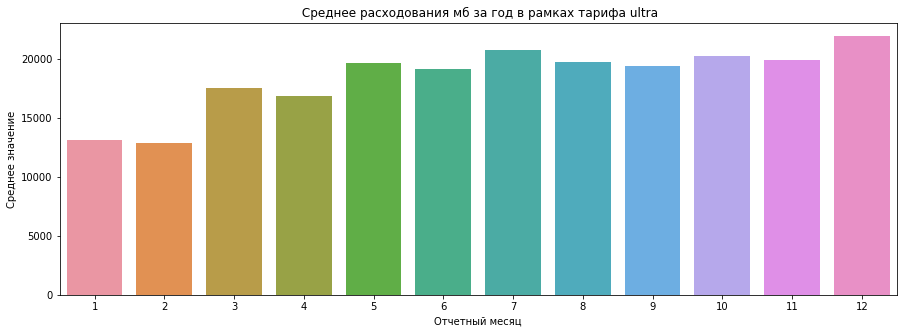

In [101]:
plt.figure(figsize=(15,5))
sns.barplot(data=ultra_means_per_monthes, x='month', y='mean_mb')
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее расходования мб за год в рамках тарифа ultra')
plt.show()

Среднее расходования мб в рамках тарифа в разрезе годового периода
- smart: В целом средние значения на всем промежутке более менее равны, в начале года спад, к концу года небольшое увеличение
- ultra: Аналогочино тарифу smart. В целом на средние значения на всем промежутке более менее равны, в начале года спад, к концу года небольшое увеличение.

In [102]:
basic_stats(ultra['mb_used'])

('Среднее: 19686.76717948718',
 'Дисперсия: 99043439.60795662',
 'Стандартное отклонение: 9952.057054094726')

In [103]:
basic_stats(smart['mb_used'])

('Среднее: 16236.47262118492',
 'Дисперсия: 34443100.68133359',
 'Стандартное отклонение: 5868.824471845583')

Описание распределения кол-ва ежемесячно потраченных Мб в рамках тарифа.
- smart: В среденем пользователи тарифа тратят 16236 мб в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 49542 Мб, 66 % всех значений в промежутке от 4500 до 27972 Мб. В целом распределение похоже на нормальное со средним 16236 и стандартным отклонением 9952, что также видно на диаграмме размаха.
- ultra: В среденем пользователи тарифа тратят 19686 мб в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 46092 минут, 66 % всех значений в промежутке от 0 до 39590 минут. В целом распределение немного скошено вправо со средним 19686 и стандартным отклонением 9952, что также видно на диаграмме размаха.

Построим гистограммы плотности распределения кол-ва ежемесячно потраченных сообщений для каждого тарифа

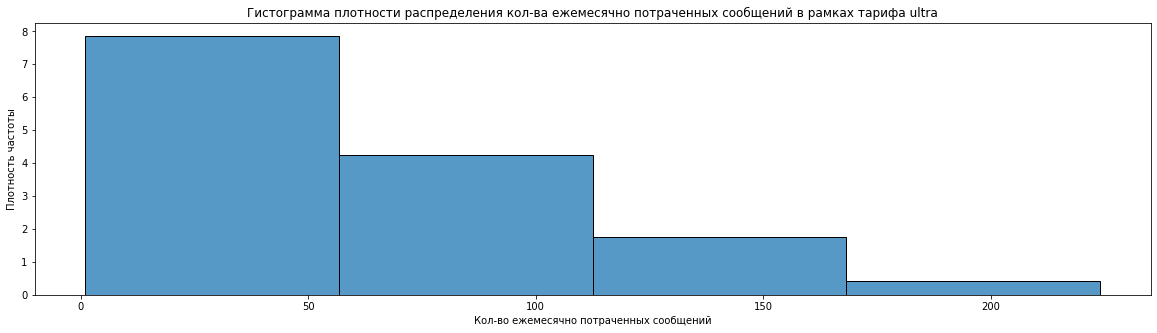

In [104]:
plt.figure(figsize=(20,5))
sns.histplot(data=ultra, x='message_numbers', stat ='frequency', bins = 4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных сообщений')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных сообщений в рамках тарифа ultra')
plt.show()

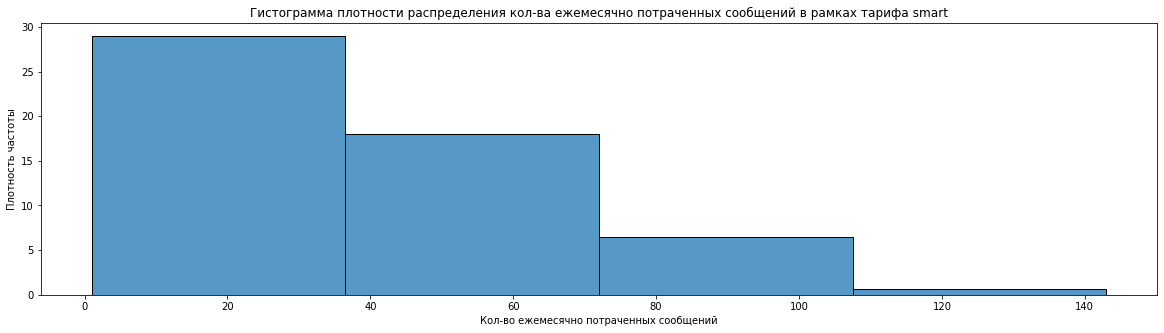

In [105]:
plt.figure(figsize=(20,5))
sns.histplot(data=smart, x='message_numbers', stat ='frequency', bins = 4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных сообщений')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных сообщений в рамках тарифа smart')
plt.show()

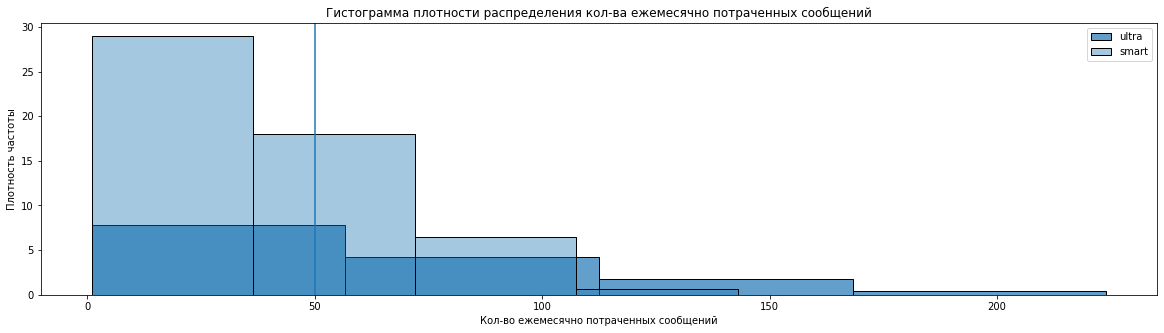

In [106]:
plt.figure(figsize=(20,5))
sns.histplot(data=ultra, x='message_numbers', stat ='frequency', bins = 4, alpha = 0.7)
sns.histplot(data=smart, x='message_numbers', stat ='frequency', bins = 4, alpha = 0.4)
plt.ylabel('Плотность частоты')
plt.xlabel('Кол-во ежемесячно потраченных сообщений')
plt.title('Гистограмма плотности распределения кол-ва ежемесячно потраченных сообщений')
plt.legend(['ultra', 'smart'])
plt.axvline(50, 0, 30.0)
plt.show()

In [107]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb,tariff
0,50,15360,500,550,200,3,3,smart,0.195312,smart
1,1000,30720,3000,1950,150,1,1,ultra,0.146484,ultra


Тарифы
- smart: кол-во бесплатных сообщений, включенных в абонентскую плату составляет 50. На представленной гистограмме кол-во случаев превышения данного лимита составило примерно 600 раз (на глаз 20 * 17 + 40 * 6 + 20 * 1), что составило 27 % всех данных. В принципе большая часть пользователей укладывается в тариф.
- ultra: кол-во бесплатных сообщений, включенных в абонентскую плату составляет 1000.  На представленной гистограмме кол-во случаев превышения данного лимита не обнаружено.

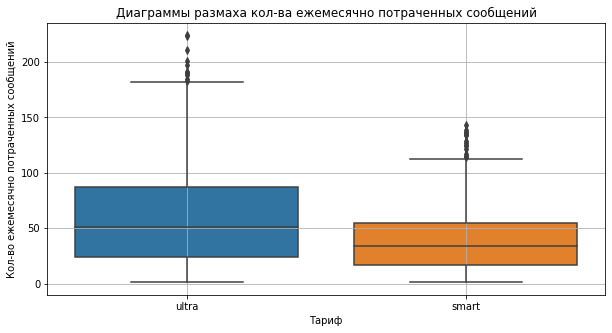

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x='tariff', y='message_numbers', data=total_report)
plt.grid()
plt.title('Диаграммы размаха кол-ва ежемесячно потраченных сообщений')
plt.xlabel('Тариф')
plt.ylabel('Кол-во ежемесячно потраченных сообщений')
plt.show()

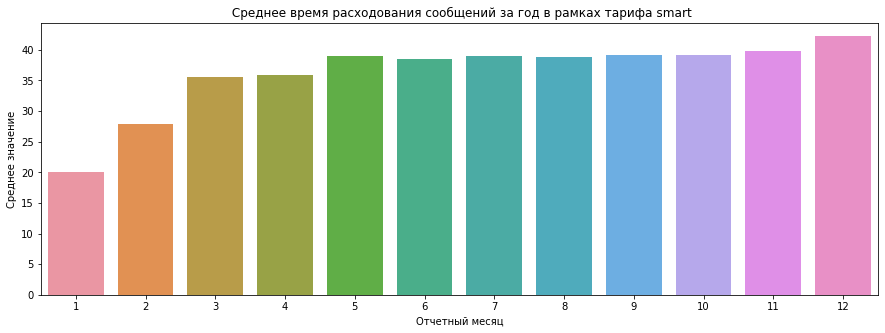

In [109]:
plt.figure(figsize=(15,5))
sns.barplot(data=smart_means_per_monthes, x='month', y='mean_mess')
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее время расходования сообщений за год в рамках тарифа smart')
plt.show()

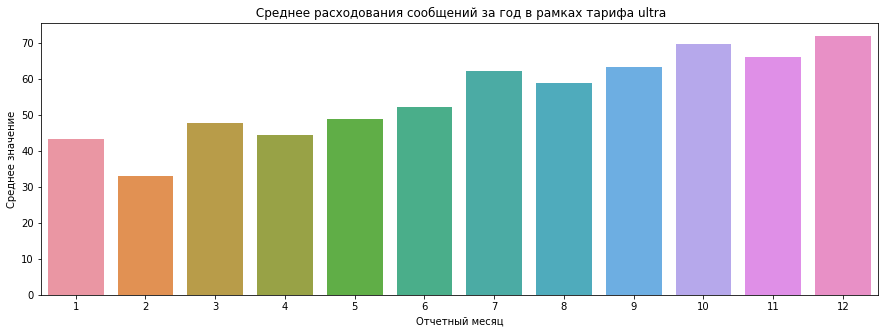

In [110]:
plt.figure(figsize=(15,5))
sns.barplot(data=ultra_means_per_monthes, x='month', y='mean_mess')
plt.ylabel('Среднее значение')
plt.xlabel('Отчетный месяц')
plt.title(' Среднее расходования сообщений за год в рамках тарифа ultra')
plt.show()

Среднее расходования сообщений в рамках тарифа в разрезе годового периода
- smart: В целом средние значения на всем промежутке более менее равны, в начале года спад, к концу года небольшое увеличение
- ultra: В начале года спад, к концу года небольшое увеличение.

In [111]:
basic_stats(ultra['message_numbers'])

('Среднее: 61.161006289308176',
 'Дисперсия: 2109.6591828651995',
 'Стандартное отклонение: 45.93102636416042')

In [112]:
basic_stats(smart['message_numbers'])

('Среднее: 38.71644120707596',
 'Дисперсия: 717.5942011753547',
 'Стандартное отклонение: 26.787948804926344')

Описание распределения кол-ва ежемесячно потраченных сообщений в рамках тарифа.
- smart: В среденем пользователи тарифа тратят 38 сообщений в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 116 сообщений, 66 % всех значений в промежутке от 0 до 90 сообщений. В целом распределение немного скошено вправо со средним 38 и стандартным отклонением 26, что также видно на диаграмме размаха.
- ultra: В среденем пользователи тарифа тратят 61 сообщений в месяц. Практически 99% всех значений выборки находится в промежутке от 0 до 196 сообщений, 66 % всех значений в промежутке от 0 до 151 минут. В целом распределение немного скошено вправо со средним 61 и стандартным отклонением 45, что также видно на диаграмме размаха.

In [113]:
total_report

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22,1950.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60,1950.00
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75,1950.00
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81,1950.00
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-12-01,2018-07-01,NaN,NaN,NaN,NaN,550.00
3255,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,2018-09-01,9,70,1848,11,550.00
3256,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,2018-09-01,68,449,17809,48,1028.32
3257,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,2018-09-01,74,612,17984,59,1425.50


In [114]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb,tariff
0,50,15360,500,550,200,3,3,smart,0.195312,smart
1,1000,30720,3000,1950,150,1,1,ultra,0.146484,ultra


Вывод по шагу 3
- средний пользователь тарифа smart: 38 сообщений, 419 минут и около 16 Гб в месяц
- средний пользователь тарифа ultra: 61 сообщений, 545 минут и около 19 Гб в месяц

Наиболее значимый параметр тарифного плана в текущих реалиях является интернет трафик. По данным тарифа smart люди в 60% случаях готовы переплачивать сверх тарифа за дополнительный трафик, что приносит компании дополнительную выручку, что так же относиться и к тарифу ultra (интернет трафик единственный показатель, который пробивается в рамках абонетской платы на 22%).  

<a id = 'section4'></a>
## Проверка гипотез

In [115]:
from scipy import stats as st

Проверим гипотизу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 
- нулевая гипотеза Н0:  средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
- альтернмтивная гипотеза Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [116]:
alpha = .05

Проверка дисперсии

In [117]:
basic_stats(ultra['revenue'])

('Среднее: 2058.2227137176938',
 'Дисперсия: 124550.48696984234',
 'Стандартное отклонение: 352.9171106220869')

In [118]:
basic_stats(smart['revenue'])

('Среднее: 1226.0700577008433',
 'Дисперсия: 618763.831833256',
 'Стандартное отклонение: 786.6154281688454')

In [119]:
results = st.ttest_ind(
    smart['revenue'], 
    ultra['revenue'], equal_var=False)

In [120]:
results.pvalue

8.767754191389305e-305

In [121]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, однако насколько возможно, что это лишь случаность предложенной выборки. Полученное значение p-value говорит о том, что с вероятностью намного меньше 1%(8.767754191389305e-305) такое или большее различие можно получить случайно. Это явно слишком маленькая вероятность, чтобы делать вывод  о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются. 

Проверим гипотизу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- нулевая гипотеза Н0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- альтернмтивная гипотеза Н1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [122]:
Moscow_revenue = total_report.query('city == "Москва"')
Moscow_revenue.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,2018-11-01,59,430,18452,NaN,1153.91
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,2018-11-01,63,414,14053,NaN,550.00
17,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01,2018-08-01,55,380,8571,37,1950.00
18,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-09-01,2018-08-01,134,961,12479,91,1950.00
19,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-10-01,2018-08-01,108,855,14779,83,1950.00


In [123]:
Other_region_revenue = total_report.query('city != "Москва"')
Other_region_revenue.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,monthes,reg_month,number_of_calls,total_min,mb_used,message_numbers,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22,159,2256,22,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43,172,23257,60,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47,340,14016,75,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52,408,14070,81,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58,466,14581,57,1950.0


Проверка дисперсии

In [124]:
basic_stats(Moscow_revenue['revenue'])

('Среднее: 1507.7606148867314',
 'Дисперсия: 545592.7213947591',
 'Стандартное отклонение: 738.642485506188')

In [125]:
basic_stats( Other_region_revenue['revenue'])

('Среднее: 1477.1343544112078',
 'Дисперсия: 629970.7049855774',
 'Стандартное отклонение: 793.7069389803628')

In [126]:
results = st.ttest_ind(
    Moscow_revenue['revenue'], 
    Other_region_revenue['revenue'], equal_var=False)

In [127]:
results.pvalue

0.360640060746211

In [128]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка клиентов в регионах, Москве и неодинакова, но с вероятностью в 36% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

Вывод по шагу 4
Проверены две гипотезы по данным двух выборок
- Средние значения выручки от разных тарифов различны, но с веротяностью менее 1% данные средние получены случайно. Это явно слишком маленькая вероятность, чтобы делать вывод  о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются. 
- Средние значения выручки в городе Москва и в остальных регионах различны, но с веротяностью 36% данные средние получены случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

<a id = 'section5'></a>
## Общий вывод

In [129]:
smart['revenue'].mean()

1226.0700577008433

In [130]:
ultra['revenue'].mean()

2058.2227137176938

In [131]:
total_report['tariff'].value_counts(normalize=True)

smart    0.691316
ultra    0.308684
Name: tariff, dtype: float64

In [132]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb,tariff
0,50,15360,500,550,200,3,3,smart,0.195312,smart
1,1000,30720,3000,1950,150,1,1,ultra,0.146484,ultra


Вывод

Если смотреть с позиции организации, то получается нам нужно максимизировать выручку. На основе выборки из 500 клиентов выявили, что средняя выручка с одного клиента по тарифу smart 1226 рублей, средняя выручка по тарифу ultra 2058. Так же не подтвердили нулевую гипотезу о том, что выборочные средние по выручке двух тарифов не различаются, p-value составил менее 1%, что говорит о том, что получить данные различия при равных средних крайне мала, значит выборочные средние различны. В условиях максимизации прибыли тариф ultra очевидно принесет большую выручку с одного клиента, что соответсвенно выгоднее для организации

С точки зрения клиента я бы признал тариф smart более привлекательным, можно попытаться выиграть за счет объема.
1. Во-первых он не такой затратный для пользователей. На первый взгляд всего лишь 550 р за месяц, что позволяет сделать больший охват ( в предложенной выборке 70% smart на 30% ultra). 
2. Во-вторых если смотреть средние значение выручки, то по smart выходит в среднем 1226 р в месяц при абонентской плате в 550 р. Причина этому перерасход лимита - в среднем 60% пользователей регулярно превышают лимит интернет трафика включенный в абонентскую плату. То же самое есть и с минутами и смс, но в меньшей степени. Ultra средние траты за тариф 2058 рублей при абонентской плате в 1950, отклонения минимальны.
3. Рекламную компанию лучше проводить в конце первого полугодия, так как к концу года перерасход более вероятен.



In [133]:
smart['revenue'].mean()

1226.0700577008433

In [134]:
ultra['revenue'].mean()

2058.2227137176938